In [1]:
# Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# df = pd.read_csv(r'C:\Users\ddugky\Downloads\Linear-Regression-master\Linear-Regression-master\House_Price_Detection\USA_Housing.csv')

In [3]:
df = pd.read_csv(r'C:\Users\ddugky\Downloads\Linear-Regression-master\Linear-Regression-master\House_Price_Detection\USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
df.sample()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
956,54648.286073,5.531124,8.461381,4.09,20270.541945,714822.58717,"80371 Timothy Views\nAbigailborough, MN 16645"


In [7]:
df.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
df.shape

(5000, 7)

In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

KeyError: 'society'

In [ ]:
per_missing_society_data*df['society']/100

In [ ]:
#desc
df.describe()

In [ ]:
df['society'].count()

In [ ]:
# Average= null/total*100
missing_values = df['society'].isnull().sum() 

In [ ]:
missing_values

In [ ]:
count_society = df['society'].count()

In [ ]:
total_data_in_society=missing_values+count_society

In [ ]:
total_data_in_society

In [ ]:
df.shape

In [ ]:
per_of_missing_data_in_society = missing_values/total_data_in_society*100

In [ ]:
per_of_missing_data_in_society

In [ ]:
df.columns

In [ ]:
df['society'].shape

In [ ]:
# X = df[['area_type', 'availability', 'location', 'size', 'society',
#        'total_sqft', 'bath', 'balcony']]

In [ ]:
# X

In [ ]:
# X.columns

In [ ]:
# y = df['price']

In [ ]:
# y

In [ ]:
# from sklearn.model_selection import train_test_split


In [ ]:
# X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
# from sklearn.linear_model import LinearRegression

In [ ]:
# lr = LinearRegression()

In [ ]:
# lr.fit(X_train,y_train)

In [ ]:
# X

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# X

In [ ]:
df['area_type']=label_encoder.fit_transform(df['area_type'])
df['availability']=label_encoder.fit_transform(df['availability'])
df['location']=label_encoder.fit_transform(df['location'])
df['size']=label_encoder.fit_transform(df['size'])
df['society']=label_encoder.fit_transform(df['society'])
df['total_sqft']=label_encoder.fit_transform(df['total_sqft'])
df['bath']=label_encoder.fit_transform(df['bath'])
df['balcony']=label_encoder.fit_transform(df['balcony'])

In [ ]:
df.columns

In [ ]:
X= df[['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony']]

In [ ]:
X

In [ ]:
y=df['price']

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)

In [ ]:
df

In [ ]:
df['size'].unique()

In [ ]:
X.isnull().sum()

In [ ]:
y.isnull().sum()

In [ ]:
area_type = df['area_type'].unique()

In [ ]:
area_type

In [ ]:
unique_value_of_location = df['location'].unique()

In [ ]:
unique_value_of_location

In [ ]:
df.columns

In [ ]:
location = df['size']

In [ ]:
location

In [ ]:
df['location']

In [ ]:
lr.fit(X_train,y_train)

In [12]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [17]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [18]:
y = df['Price']

In [19]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
lr.intercept_

-2641372.66730123

In [32]:
lr.coef_

array([2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
       1.52251955e+01])

In [33]:
#prediction
pred = lr.predict(X_test)

In [34]:
pred

array([1258934.8950529 ,  822694.63411047, 1742214.39530118, ...,
       1452640.96473335,  645797.13026318, 1364943.76221892])

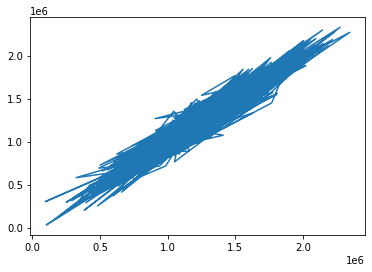

In [41]:
plt.plot(pred,y_test)

In [45]:
#evaluation Matrix
#MAE---->mean absolute error.
# MSE---->mean squared error.
# RMSE-->Root mean square error.
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

81257.5579585586

In [46]:
# mse
metrics.mean_squared_error(y_test,pred)

10169125565.897497

In [48]:
#rmse
np.sqrt(metrics.mean_squared_error(y_test,pred))

100842.08231634994